In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Task 0
#Start by creating 3 additional training sets from the training 
#dataset 1000-100, using the initial 50, 100, and 150 examples
data = pd.read_csv('train-1000-100.csv')
data_out = pd.read_csv('trainR-1000-100.csv')

#50(1000)-100
fifty = data[:50]
fifty = np.array(fifty)
fifty_output = data_out[:50]
fifty_output = np.array(fifty_output)


#100(1000)-100
hund = data[:100]
hund = np.array(hund)
hund_output = data_out[:100]
hund_output = np.array(hund_output)

#150(1000)-100
hund_fifty = data[:150]
hund_fifty = np.array(hund_fifty)
hund_fifty_output= data_out[:150]
hund_fifty_output = np.array(hund_fifty_output)

output_data_100_10 = np.array(pd.read_csv('trainR-100-10.csv'))
output_data_100_100 = np.array(pd.read_csv('trainR-100-100.csv'))
output_data_1000_100 = np.array(pd.read_csv('trainR-1000-100.csv'))
output_forestfire = np.array(pd.read_csv('trainR-forestfire.csv'))
output_realestate = np.array(pd.read_csv('trainR-realestate.csv'))

input_data_100_10 = np.array(pd.read_csv('train-100-10.csv'))
input_data_100_100 = np.array(pd.read_csv('train-100-100.csv'))
input_data_1000_100 = np.array(pd.read_csv('train-1000-100.csv'))
input_forestfire = np.array(pd.read_csv('train-forestfire.csv'))
input_realestate = np.array(pd.read_csv('train-realestate.csv'))


#read testing
test_100_10 = np.array(pd.read_csv('test-100-10.csv'))
test_100_100 = np.array(pd.read_csv('test-100-100.csv'))
test_1000_100 = np.array(pd.read_csv('test-1000-100.csv'))
test_forestfire = np.array(pd.read_csv('test-forestfire.csv'))
test_realestate = np.array(pd.read_csv('test-realestate.csv'))

fifty_test = test_1000_100[:50]
hund_test = test_1000_100[:100]
hund_fifty_test = test_1000_100[:150]

#read testing output
test_100_10_output = np.array(pd.read_csv('testR-100-10.csv'))
test_100_100_output = np.array(pd.read_csv('testR-100-100.csv'))
test_1000_100_output = np.array(pd.read_csv('testR-1000-100.csv'))
test_forestfire_output = np.array(pd.read_csv('testR-forestfire.csv'))
test_realestate_output = np.array(pd.read_csv('testR-realestate.csv'))

fifty_test_output = test_1000_100_output[:50]
hund_test_output = test_1000_100_output[:100]
hund_fifty_test_output = test_1000_100_output[:150]

In [3]:
#Task 1
#For each of the 8 datasets (5 original and 3 you created), plot the training set MSE and the test
#set MSE as a function of the regularization parameter λ (use integer values in the range 0 to 150).

def calc_perf_metric__squared_error(y_N, yhat_N):
    #Compute the mean squared error given true and predicted values

    #mse : scalar float
    #mse = \mean_{n=1}^N (y_n - \hat{y}_n)^2

    mse = np.mean((y_N - yhat_N) ** 2)
    return mse

import numpy as np
from numpy.linalg import inv    


class LeastSquaresLinearRegressor(object):
    #Fit by solving the "least squares" optimization.

    def __init__(self):

        self.w = 0


    def fit(self,phi,lambda_,t):
      
        #w = inv(λI + ΦTΦ) * ΦTt.
        
        I = np.identity(len(phi[0]))

        phi_dupe = np.array(phi)
        
        phi_transpose = np.transpose(phi_dupe)

        tmp = lambda_ * I + np.dot(phi_transpose,phi_dupe)
        
        self.w = np.dot(inv(tmp), np.dot(phi_transpose, t))
        
        self.w = np.transpose(self.w)
    

        
    def predict(self, x_NF):

        
        pre = x_NF.dot(self.w.transpose())
        return pre
    
    
    def return_weight(self, k):

        k = self.w.copy()
        
        return k

    

In [4]:
#task 3
import random
from numpy import linalg as LA

class Bayesian_LinearRegressor(object):
    

    def __init__(self):

        
        #start with random alpha and beta
        self.alpha = random.randint(1,101)
        self.beta = random.randint(1,101)
        self.m_N = 0
        self.S_N = 0

    def fit(self,phi,t):
        
        
        phi_dupe = phi.copy()
        t_dupe = t.copy()
        I = np.identity(len(phi[0]))

        
        prev_alpha = 0
        prev_beta = 0
        difference = 0.001
        
        #beta should converge
        for iter_ in range(100000):
            
            
            
            if (self.alpha - prev_alpha < difference) and (self.beta - prev_beta < difference):
                break
            
            prev_alpha = self.alpha
            prev_beta = self.beta
  

            self.S_N = inv(self.alpha * I + self.beta * (phi_dupe.T @ phi_dupe))
            self.m_N = self.beta * (self.S_N @ phi_dupe.T@ t_dupe)
            matrix = self.beta * phi_dupe.T @ phi_dupe
            eigenvalues, eigenvectors = LA.eig(matrix)
            ita = 0
            
            for each_eigen_value in eigenvalues:
                ita = ita + (each_eigen_value/(self.alpha + each_eigen_value))
        
        
            
            self.alpha = ita/(self.m_N.T @ self.m_N)
            self.alpha = self.alpha[0][0]
            
            N = len(phi)
            temp = 0
            for each_n in range(N):
                
                temp = temp + (t_dupe[each_n] - (self.m_N.T @ phi_dupe[each_n]))**2
        
            self.beta = 1/((1/(N-ita))*temp)
            self.beta = self.beta[0]
                               
    
    def predict(self,x_test):
            
        
        return (x_test @ self.m_N)

In [5]:
#this function is to do cross_validation
#according to n_folds
#and will take the weight that corresponds to
#the largest average accuracy
#then I will run the entire set
#using this weight
#then to predict the y values
def cross_validation(train_x,train_y):
    
    
    each_set = int(len(train_x)/10)
    mse_list = []
    lamb_list = []
    
    for lamb in range(151):
        
        mse = []
        #1
        test_1_x = train_x[:each_set]
        test_1_y = train_y[:each_set]
        train_1_x = train_x[each_set:]
        train_1_y = train_y[each_set:]
        
        l_1 = LeastSquaresLinearRegressor()
        l_1.fit(train_1_x,lamb,train_1_y)
        yhat_ = l_1.predict(test_1_x)
        mse_y = calc_perf_metric__squared_error(test_1_y,yhat_)
        mse.append(mse_y)
        
        
        #2
        test_2_x = train_x[each_set:(each_set*2)]
        test_2_y = train_y[each_set:(each_set*2)]
        train_2_x = np.vstack((train_x[:each_set],train_x[(each_set*2):]))
        train_2_y = np.vstack((train_y[:each_set],train_y[(each_set*2):]))
        
        l_2 = LeastSquaresLinearRegressor()
        l_2.fit(train_2_x,lamb,train_2_y)
        yhat_ = l_2.predict(test_2_x)
        mse_y = calc_perf_metric__squared_error(test_2_y,yhat_)
        mse.append(mse_y)
        
        
        #3
        test_3_x = train_x[(each_set*2):(each_set*3)]
        test_3_y = train_y[(each_set*2):(each_set*3)]
        train_3_x = np.vstack((train_x[:(each_set*2)],train_x[(each_set*3):]))
        train_3_y = np.vstack((train_y[:(each_set*2)],train_y[(each_set*3):]))
        
        l_3 = LeastSquaresLinearRegressor()
        l_3.fit(train_3_x,lamb,train_3_y)
        yhat_ = l_3.predict(test_3_x)
        mse_y = calc_perf_metric__squared_error(test_3_y,yhat_)
        mse.append(mse_y)
        
        
        #4
        test_4_x = train_x[(each_set*3):(each_set*4)]
        test_4_y = train_y[(each_set*3):(each_set*4)]
        train_4_x = np.vstack((train_x[:(each_set*3)],train_x[(each_set*4):]))
        train_4_y = np.vstack((train_y[:(each_set*3)],train_y[(each_set*4):]))
        
        l_4 = LeastSquaresLinearRegressor()
        l_4.fit(train_4_x,lamb,train_4_y)
        yhat_ = l_4.predict(test_4_x)
        mse_y = calc_perf_metric__squared_error(test_4_y,yhat_)
        mse.append(mse_y)
        
        #5
        test_5_x = train_x[(each_set*4):(each_set*5)]
        test_5_y = train_y[(each_set*4):(each_set*5)]
        train_5_x = np.vstack((train_x[:(each_set*4)],train_x[(each_set*5):]))
        train_5_y = np.vstack((train_y[:(each_set*4)],train_y[(each_set*5):]))
        
        l_5 = LeastSquaresLinearRegressor()
        l_5.fit(train_5_x,lamb,train_5_y)
        yhat_ = l_5.predict(test_5_x)
        mse_y = calc_perf_metric__squared_error(test_5_y,yhat_)
        mse.append(mse_y)
        
        
        #6
        test_6_x = train_x[(each_set*5):(each_set*6)]
        test_6_y = train_y[(each_set*5):(each_set*6)]
        train_6_x = np.vstack((train_x[:(each_set*5)],train_x[(each_set*6):]))
        train_6_y = np.vstack((train_y[:(each_set*5)],train_y[(each_set*6):]))
        
        l_6 = LeastSquaresLinearRegressor()
        l_6.fit(train_6_x,lamb,train_6_y)
        yhat_ = l_6.predict(test_6_x)
        mse_y = calc_perf_metric__squared_error(test_6_y,yhat_)
        mse.append(mse_y)        
        
        
        #7
        test_7_x = train_x[(each_set*6):(each_set*7)]
        test_7_y = train_y[(each_set*6):(each_set*7)]
        train_7_x = np.vstack((train_x[:(each_set*6)],train_x[(each_set*7):]))
        train_7_y = np.vstack((train_y[:(each_set*6)],train_y[(each_set*7):]))
        
        l_7 = LeastSquaresLinearRegressor()
        l_7.fit(train_7_x,lamb,train_7_y)
        yhat_ = l_7.predict(test_7_x)
        mse_y = calc_perf_metric__squared_error(test_7_y,yhat_)
        mse.append(mse_y)
        
        
        #8
        test_8_x = train_x[(each_set*7):(each_set*8)]
        test_8_y = train_y[(each_set*7):(each_set*8)]
        train_8_x = np.vstack((train_x[:(each_set*7)],train_x[(each_set*8):]))
        train_8_y = np.vstack((train_y[:(each_set*7)],train_y[(each_set*8):]))
        
        l_8 = LeastSquaresLinearRegressor()
        l_8.fit(train_8_x,lamb,train_8_y)
        yhat_ = l_8.predict(test_8_x)
        mse_y = calc_perf_metric__squared_error(test_8_y,yhat_)
        mse.append(mse_y)
        
        #9
        test_9_x = train_x[(each_set*8):(each_set*9)]
        test_9_y = train_y[(each_set*8):(each_set*9)]
        train_9_x = np.vstack((train_x[:(each_set*8)],train_x[(each_set*9):]))
        train_9_y = np.vstack((train_y[:(each_set*8)],train_y[(each_set*9):]))
        
        l_9 = LeastSquaresLinearRegressor()
        l_9.fit(train_9_x,lamb,train_9_y)
        yhat_ = l_9.predict(test_9_x)
        mse_y = calc_perf_metric__squared_error(test_9_y,yhat_)
        mse.append(mse_y)
        
        #10
        test_10_x = train_x[(each_set*9):(each_set*10)]
        test_10_y = train_y[(each_set*9):(each_set*10)]
        train_10_x = np.vstack((train_x[:(each_set*9)],train_x[(each_set*10):]))
        train_10_y = np.vstack((train_y[:(each_set*9)],train_y[(each_set*10):]))
        
        l_10 = LeastSquaresLinearRegressor()
        l_10.fit(train_10_x,lamb,train_10_y)
        yhat_ = l_10.predict(test_10_x)
        mse_y = calc_perf_metric__squared_error(test_10_y,yhat_)
        mse.append(mse_y)
        
        mse_list.append(np.mean(mse))
        lamb_list.append(lamb)
        

    print('Optimal lambda is ', np.argmin(mse_list))
    
    return mse_list,np.argmin(mse_list)

In [6]:
#this function is to plot all the data
def plot_lambda(train_x,train_y,test_x,test_y,name):
    
    x_lambda_train = []
    y_mse_train = []
    
    x_lambda_test = []
    y_mse_test = []
    
    bayes = []
    
    l_ = Bayesian_LinearRegressor()
    l_.fit(train_x,train_y)
    yhat_ = l_.predict(test_x)
    bayes_pred = calc_perf_metric__squared_error(test_y,yhat_)

    
    for i in range(151):
        l_1 = LeastSquaresLinearRegressor()
        l_1.fit(train_x,i,train_y)
        yhat_train = l_1.predict(train_x)
        yhat_test = l_1.predict(test_x)
        mse_y = calc_perf_metric__squared_error(train_y,yhat_train)
        mse_y_test = calc_perf_metric__squared_error(test_y, yhat_test)
        
        x_lambda_train.append(i)
        x_lambda_test.append(i)
        y_mse_train.append(mse_y)
        y_mse_test.append(mse_y_test)
        bayes.append(bayes_pred)
        
    cross_,lam = cross_validation(train_x,train_y)

    l_ = LeastSquaresLinearRegressor()
    l_.fit(train_x,lam,train_y)
    yhat_ = l_.predict(test_x)
    mse_yy = calc_perf_metric__squared_error(test_y,yhat_)
    print('mse on ',name,' with lambda = ', lam, ' is ',mse_yy )


    label_1 = 'Traning MSE LR for '+name
    if np.max(y_mse_train) - np.min(y_mse_train) > 1000 or np.max(cross_) - np.min(cross_) > 1000:
        plt.yscale('log')
        
    plt.plot(x_lambda_train, y_mse_train, label=label_1)

    label_2 = 'Testing MSE LR for '+name
    plt.plot(x_lambda_test, y_mse_test, label=label_2)

    
    
    label_3 = 'Bayesian Linear Regression'
    plt.plot(x_lambda_test, bayes, label=label_3)

    print('mse','using Bayesian Linear Regression is ',bayes_pred )    
    
    
    
    label_4 = 'cross Validation '+name
    plt.plot(x_lambda_test, cross_, label=label_4)    
    plt.legend(loc='best')
    plt.ylabel('MSE')
    plt.xlabel('lambda')
    plt.show()    

Optimal lambda is  16
mse on  100_10  with lambda =  16  is  4.216873015998771
mse using Bayesian Linear Regression is  4.389954504271834


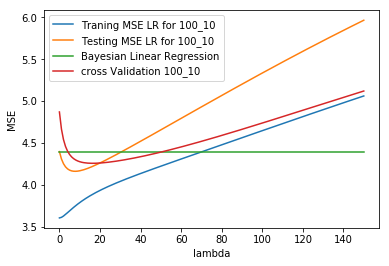

Optimal lambda is  26
mse on  100_100  with lambda =  26  is  5.118475415460068
mse using Bayesian Linear Regression is  5.396728305157534


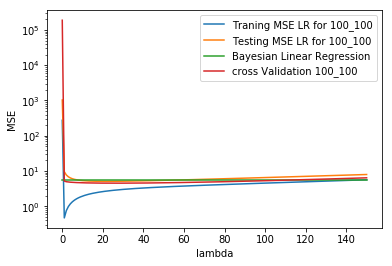

Optimal lambda is  38
mse on  1000_100  with lambda =  38  is  4.326671794759142
mse using Bayesian Linear Regression is  4.392176548936954


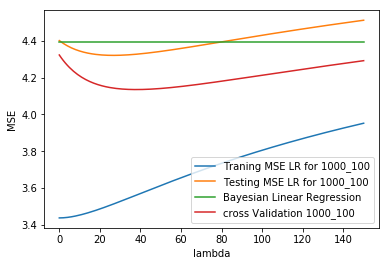

Optimal lambda is  24
mse on  50(1000)-100  with lambda =  24  is  7.562866503723606
mse using Bayesian Linear Regression is  8.932095389052106


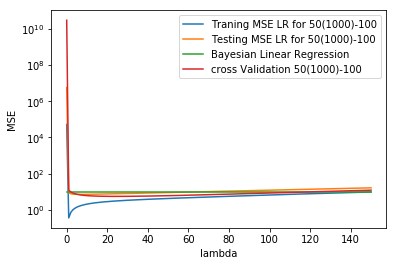

Optimal lambda is  26
mse on  100(1000)-100  with lambda =  26  is  5.7425020201743076
mse using Bayesian Linear Regression is  7.846503136631188


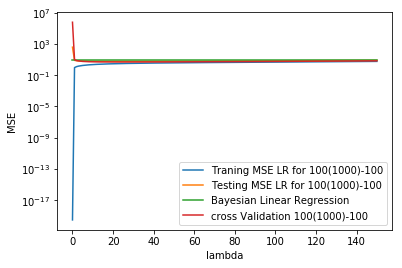

Optimal lambda is  46
mse on  150(1000)-100  with lambda =  46  is  5.65694507547496
mse using Bayesian Linear Regression is  9.390225697814115


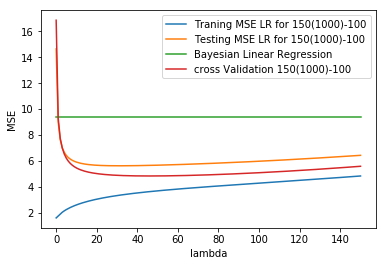

Optimal lambda is  150
mse on  forestfire  with lambda =  150  is  244.31186993215752
mse using Bayesian Linear Regression is  243.30055724505038


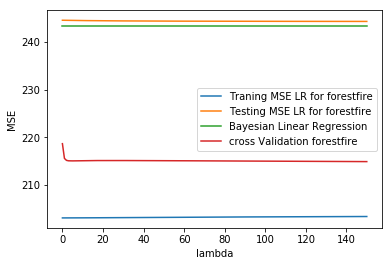

Optimal lambda is  0
mse on  realestate  with lambda =  0  is  51.457543556421356
mse using Bayesian Linear Regression is  60.272889112899755


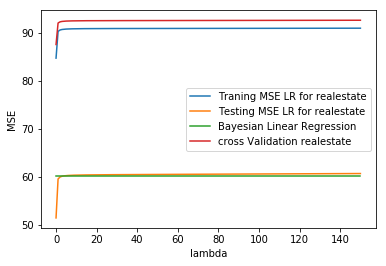

In [7]:
if __name__ == '__main__':
    
    plot_lambda(input_data_100_10,output_data_100_10,test_100_10,test_100_10_output,'100_10')
    plot_lambda(input_data_100_100,output_data_100_100,test_100_100,test_100_100_output,'100_100')
    plot_lambda(input_data_1000_100,output_data_1000_100,test_1000_100,test_1000_100_output,'1000_100')
    plot_lambda(fifty,fifty_output,fifty_test,fifty_test_output,'50(1000)-100')
    plot_lambda(hund,hund_output,hund_test,hund_test_output,'100(1000)-100')
    plot_lambda(hund_fifty,hund_fifty_output,hund_fifty_test,hund_fifty_test_output,'150(1000)-100')
    plot_lambda(input_forestfire,output_forestfire,test_forestfire,test_forestfire_output,'forestfire')
    plot_lambda(input_realestate,output_realestate,test_realestate,test_realestate_output,'realestate')